# 地下城游戏

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/dungeon-game/**

## 一、题目

一些恶魔抓住了公主（P）并将她关在了地下城的右下角。地下城是由 M x N 个房间组成的二维网格。我们英勇的骑士（K）最初被安置在左上角的房间里，他必须穿过地下城并通过对抗恶魔来拯救公主。

骑士的初始健康点数为一个正整数。如果他的健康点数在某一时刻降至 0 或以下，他会立即死亡。

有些房间由恶魔守卫，因此骑士在进入这些房间时会失去健康点数（若房间里的值为负整数，则表示骑士将损失健康点数）；其他房间要么是空的（房间里的值为 0），要么包含增加骑士健康点数的魔法球（若房间里的值为正整数，则表示骑士将增加健康点数）。

为了尽快到达公主，骑士决定每次只向右或向下移动一步。

编写一个函数来计算确保骑士能够拯救到公主所需的最低初始健康点数。

### 说明:

- 骑士的健康点数没有上限。
- 任何房间都可能对骑士的健康点数造成威胁，也可能增加骑士的健康点数，包括骑士进入的左上角房间以及公主被监禁的右下角房间。

## 二、示例

例如，考虑到如下布局的地下城，如果骑士遵循最佳路径 右 -> 右 -> 下 -> 下，则骑士的初始健康点数至少为 7。

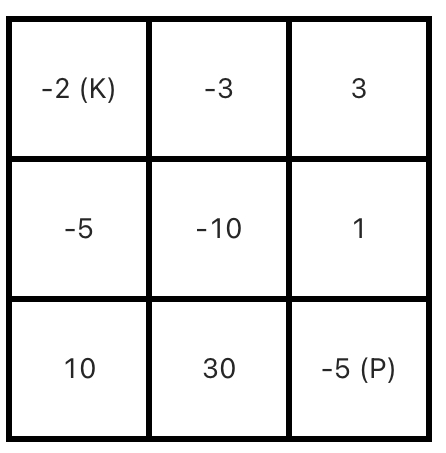

## 三、解题思路

### 动态规划

这个问题从左上到右下递推可以得到累计获得的最大的血量，但是这样无法转换成问题本身，我们可以考虑从右下到左上递推。

#### 从右下到左上

- dp数组，dp[i][j]代表，从这个格子到右下所需要的最小的血量
- 边界条件最后一行和左后一列的边界值 $ dp[row-1][col-1] = max(1, 1-dungeon[row-1][col-1]); dp[i][col-1] = max(1, dp[i+1][col-1] - dungeon[i][col-1]); dp[row-1][j] = max(1, dp[row-1][j+1] - dungeon[row-1][j]) $
- 递推公式$ dp[i][j] = max(1, min(dp[i+1][j], dp[i][j+1]) - dungeon[i][j]) $

In [1]:
class Solution:
    def calculateMinimumHP(self, dungeon) -> int:
        if not dungeon or not dungeon[0]:
            return 1
        row, col = len(dungeon), len(dungeon[0])
        dp = [[0] * col for i in range(row)]
        # 边界
        dp[row-1][col-1] = max(1, 1 - dungeon[row-1][col-1])

        for i in range(row-2, -1, -1):
            if i < 0:
                continue
            dp[i][-1] = max(1, dp[i+1][-1] - dungeon[i][-1])
        for j in range(col-2, -1, -1):
            if j < 0:
                continue
            dp[-1][j] = max(1, dp[-1][j+1] - dungeon[-1][j])

        # 递推
        for i in range(row-2, -1, -1):
            for j in range(col-2, -1, -1):
                if i < 0 or j < 0:
                    continue
                dp[i][j] = max(1, min(dp[i+1][j], dp[i][j+1]) - dungeon[i][j])
        return dp[0][0]

In [2]:
s = Solution()
s.calculateMinimumHP([
    [-2, -3, 3],
    [-5, -10, 1],
    [10, 30, -5]
])

7